In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [5]:
sentences = [
    "This is a sample sentence.",
    "This is another sentence.",
    "This is a third sentence.",
    "This is a fourth sentence."
]

In [6]:
embeddings = model.encode(sentences)

In [ ]:
model.similarity(embeddings, embeddings)

In [11]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.cluster import KMeans,DBSCAN
from sentence_transformers import SentenceTransformer

In [7]:
dataset = load_dataset("amazon_polarity", split="train")

In [8]:
sample=dataset.shuffle(seed=42)[:10000]
corpus=sample["content"]
labels = sample["label"]
titles = sample["title"]

In [ ]:
pd.Series(titles).value_counts()

In [ ]:
pd.Series(labels).value_counts()

In [ ]:

pd.Series([len(e.split()) for e in corpus]).hist()

In [9]:
model_name1 = "paraphrase-distilroberta-base-v1"
model_name2 = "paraphrase-MiniLM-L6-v2"

In [12]:
model2 = SentenceTransformer(model_name2)
model1 = SentenceTransformer(model_name1)

/home/tuvis/miniconda3/envs/hf/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
corpus_embeddings = model2.encode(corpus)

In [62]:
K=5 
#kmeans = KMeans( n_clusters=5, random_state=0).fit(corpus_embeddings)
dbscan = DBSCAN(eps=5, min_samples=10).fit(corpus_embeddings)

In [63]:
cls_dist=pd.Series(dbscan.labels_).value_counts()
cls_dist

 0    9886
-1     114
Name: count, dtype: int64

In [64]:
import scipy
distances = scipy.spatial.distance.cdist(kmeans.cluster_centers_ , corpus_embeddings)

In [17]:
centers={}
print("Cluster", "Size", "Center-idx", "Center-Example", sep="\t\t")
for i,d in enumerate(distances):
  ind = np.argsort(d, axis=0)[0]
  centers[i]=ind
  print(i,cls_dist[i], ind, corpus[ind] ,sep="\t\t")

Cluster		Size		Center-idx		Center-Example
0		2981		5413		By the end of the first chapter of this book, I though it moved dreadfully slowly. I foolishly continued reading in the hope that it would eventually pick up the pace. Although the authors' vision of a world without the American revolution or the technology-spawning World Wars is not totally without interest, there are no truly new ideas here, and everything is presented in a wordy, overwrought style I find reminiscent of Dumas sans self-effacing humor. I cannot honestly recommend this book to anyone other than insomniacs.
1		1619		5441		The price was right($20), that should have been my first clue to the poor quality.The sound was ok at best. Low end was a bit muffled and the high's were not crisp.They blocked out un-wanted noise out adaquately, but the inter-changable buds are prone to falling off and getting lost way to easily. There is no case or protective pouch for storage. The gauge of the wire is too thin and the jacket o

In [18]:
distances.shape

(5, 10000)

In [ ]:

!pip install umap-learn

In [3]:
!pip3 install --upgrade numba

  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)


In [4]:
import numba

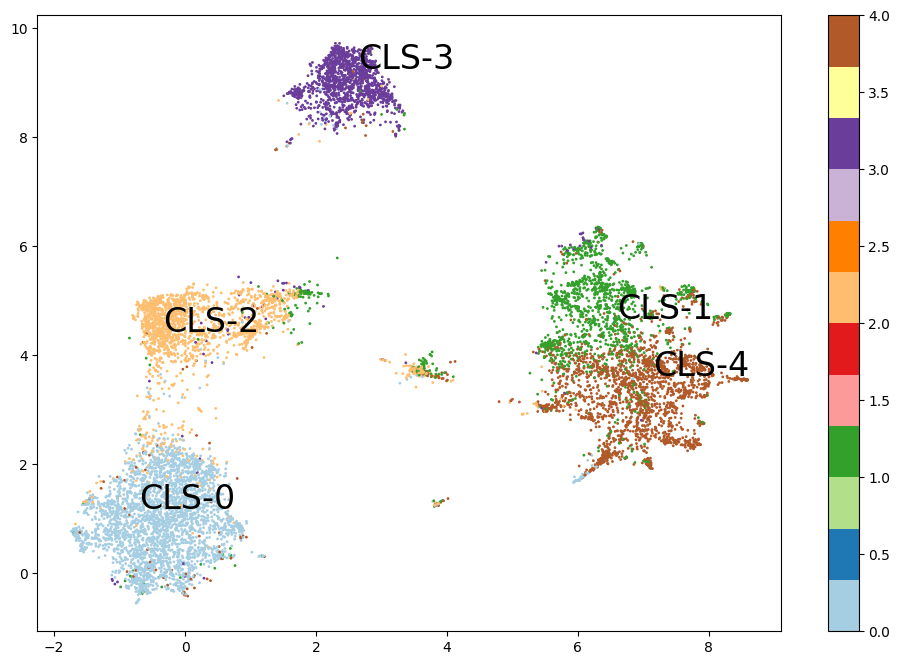

In [19]:
import matplotlib.pyplot as plt
import umap
X = umap.UMAP(n_components=2, min_dist=0.0).fit_transform(corpus_embeddings)
labels= kmeans.labels_

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=labels, s=1, cmap='Paired')
for c in centers:
  plt.text(X[centers[c],0], X[centers[c], 1], "CLS-"+ str(c), fontsize=24) 
plt.colorbar()